<a href="https://colab.research.google.com/github/armandordorica/Portfolio_Optimization/blob/master/Stock_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install pandas-datareader

In [2]:
!pip install inflect


In [3]:
# !conda install spacy

In [4]:
# import wikipedia
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

import inflect

import spacy
# nlp = spacy.load("en")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aordorica\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from pandas_datareader import data as pdr

import yfinance as yf


class Stock:

    def __init__(
        self,
        stock_name,
        start_dt,
        end_dt,
        ):
        yf.pdr_override()  # <== that's all it takes :-)

        self.stock_name = stock_name
        self.start_dt = start_dt
        self.end_dt = end_dt
        self.data = pdr.get_data_yahoo(self.stock_name,
                start=self.start_dt, end=self.end_dt)

        self.ticker = yf.Ticker(self.stock_name)
        self.beta = self.ticker.info['beta']

        self.timeseries = self.data['Close']
        self.dates = self.timeseries.index.to_frame()
        self.one_year_return = self.get_annual_return(1)
        self.two_year_return = self.get_annual_return(2)
        self.three_year_return = self.get_annual_return(3)
        self.five_year_return = self.get_annual_return(5)
        
        self.one_mth_return = self.get_monthly_return(1)
        self.three_mth_return = self.get_monthly_return(3)
        self.six_mth_return = self.get_monthly_return(6)
        
        self.one_mth_std = self.get_monthly_std(1)
        self.three_mth_std = self.get_monthly_std(3)
        self.six_mth_std = self.get_monthly_std(6)
        
        self.one_year_std = self.get_monthly_std(1*12)
        self.two_year_std = self.get_monthly_std(2*12)
        self.three_year_std = self.get_monthly_std(3*12)
        self.five_year_std = self.get_monthly_std(5*12)

    def get_annual_return(self, num_years):
        period = 365 * num_years
#         print ('Period:{}'.format(period))

        try:
            end = max(self.timeseries.index)
#         print ('end:{}'.format(end))
        except:
            print("Timeseries not available")

        try:
            start = end - timedelta(days=period)
    
            start = self.dates[self.dates['Date']
                               <= start].iloc[-1].Date
#             print ('start:{}'.format(start))

            ending_balance = self.timeseries.loc[end]
            beginning_balance = self.timeseries.loc[start]

            return (ending_balance - beginning_balance) \
                / beginning_balance
        except:
            start = end - timedelta(days=period)
            print('\n Start date:{} is not available!'.format(start))
            
    def get_monthly_return(self, num_months):
        period = 30 *num_months
#         print("Period:{}".format(period))
        end = max(self.timeseries.index)
#         print("end:{}".format(end))

        start = end - timedelta(days=period)
        try: 
            start = self.dates[self.dates['Date']<=start].iloc[-1].Date
#             print("start:{}".format(start))

            ending_balance = self.timeseries.loc[end]
            beginning_balance = self.timeseries.loc[start]  

            return ((ending_balance - beginning_balance)/beginning_balance)/(period//30)

        except:
            print("\n Start date:{} is not available!".format(start))

    def get_monthly_std(self, num_months): 
        period = 30*num_months
        print("Period:{}".format(period))
        end = max(self.timeseries.index)
        print("end:{}".format(end))

        start = end - timedelta(days=period)
        
        try: 
            std_dev = self.data.loc[start:end]['Close'].std()
#             print("start:{}".format(start))
            return std_dev

        except:
            print("\n Start date:{} is not available!".format(start))
            
    
    def get_monthly_std(self, num_months): 
        period = 30*num_months
        print("Period:{}".format(period))
        end = max(self.timeseries.index)
        print("end:{}".format(end))

        start = end - timedelta(days=period)
        try: 

            std_dev = self.data.loc[start:end]['Close'].std()
            print("start:{}".format(start))
            return std_dev

        except:
            print("\n Start date:{} is not available!".format(start))


    def plot(self):
        self.timeseries.plot()
        plt.title(self.stock_name)


In [6]:
apple = Stock ('AAPL', '2012-01-01', '2021-02-21')

[*********************100%***********************]  1 of 1 completed
Period:30
end:2021-02-19 00:00:00
start:2021-01-20 00:00:00
Period:90
end:2021-02-19 00:00:00
start:2020-11-21 00:00:00
Period:180
end:2021-02-19 00:00:00
start:2020-08-23 00:00:00
Period:360
end:2021-02-19 00:00:00
start:2020-02-25 00:00:00
Period:720
end:2021-02-19 00:00:00
start:2019-03-02 00:00:00
Period:1080
end:2021-02-19 00:00:00
start:2018-03-07 00:00:00
Period:1800
end:2021-02-19 00:00:00
start:2016-03-17 00:00:00


In [33]:
tesla = Stock('TSLA', '2012-01-01', '2021-02-25')
tesla

[*********************100%***********************]  1 of 1 completed
Period:30
end:2021-02-24 00:00:00
start:2021-01-25 00:00:00
Period:90
end:2021-02-24 00:00:00
start:2020-11-26 00:00:00
Period:180
end:2021-02-24 00:00:00
start:2020-08-28 00:00:00
Period:360
end:2021-02-24 00:00:00
start:2020-03-01 00:00:00
Period:720
end:2021-02-24 00:00:00
start:2019-03-07 00:00:00
Period:1080
end:2021-02-24 00:00:00
start:2018-03-12 00:00:00
Period:1800
end:2021-02-24 00:00:00
start:2016-03-22 00:00:00


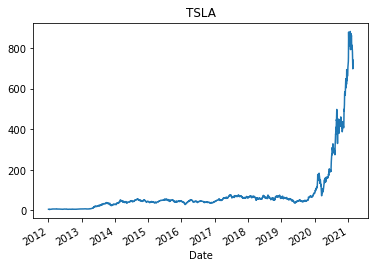

In [34]:
tesla.plot()

In [36]:
tesla.data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,5.788000,5.900000,5.530000,5.616000,5.616000,4640500
2012-01-04,5.642000,5.734000,5.500000,5.542000,5.542000,3150500
2012-01-05,5.552000,5.586000,5.370000,5.424000,5.424000,5027500
2012-01-06,5.440000,5.558000,5.282000,5.382000,5.382000,4931500
2012-01-09,5.400000,5.498000,5.224000,5.450000,5.450000,4485000
...,...,...,...,...,...,...
2021-02-18,780.900024,794.690002,776.270020,787.380005,787.380005,17897000
2021-02-19,795.000000,796.789978,777.369995,781.299988,781.299988,18904800
2021-02-22,762.640015,768.500000,710.200012,714.500000,714.500000,37011700


In [27]:
amazon.one_mth_std, amazon.get_monthly_return(8)

(42.49144362377381, 0.02356549967134228)

In [8]:
class Portfolio: 
    def __init__(self, tickers, begin_dt, end_dt):
        self.tickers = tickers
        
        self.begin_dt = begin_dt
        self.end_dt = end_dt 
    
        self.stocks = self.get_stocks()

    def get_stocks(self): 
        stocks = []
        self.stocks_not_available = []
        for i in range(0, len(self.tickers)):
            try: 
                current_stock = Stock(self.tickers[i], self.begin_dt, self.end_dt)
                print("Adding :{}".format(current_stock.stock_name) )
                stocks.append(current_stock)
            except: 
                print("{} not available".format(self.tickers[i]))
                self.stocks_not_available.append(self.tickers[i])
                pass
        return stocks
            
            
            
    

In [9]:
portfolio = Portfolio(['AMZN', 'AAPL'], '2012-01-01', '2021-02-21')
portfolio

[*********************100%***********************]  1 of 1 completed
Period:30
end:2021-02-19 00:00:00
start:2021-01-20 00:00:00
Period:90
end:2021-02-19 00:00:00
start:2020-11-21 00:00:00
Period:180
end:2021-02-19 00:00:00
start:2020-08-23 00:00:00
Period:360
end:2021-02-19 00:00:00
start:2020-02-25 00:00:00
Period:720
end:2021-02-19 00:00:00
start:2019-03-02 00:00:00
Period:1080
end:2021-02-19 00:00:00
start:2018-03-07 00:00:00
Period:1800
end:2021-02-19 00:00:00
start:2016-03-17 00:00:00
Adding :AMZN
[*********************100%***********************]  1 of 1 completed
Period:30
end:2021-02-19 00:00:00
start:2021-01-20 00:00:00
Period:90
end:2021-02-19 00:00:00
start:2020-11-21 00:00:00
Period:180
end:2021-02-19 00:00:00
start:2020-08-23 00:00:00
Period:360
end:2021-02-19 00:00:00
start:2020-02-25 00:00:00
Period:720
end:2021-02-19 00:00:00
start:2019-03-02 00:00:00
Period:1080
end:2021-02-19 00:00:00
start:2018-03-07 00:00:00
Period:1800
end:2021-02-19 00:00:00
start:2016-03-17 00:0

In [10]:
portfolio.begin_dt

'2012-01-01'

In [11]:
portfolio.end_dt

'2021-02-21'

In [12]:
# URL = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

# response = requests.get(URL)


# soup = BeautifulSoup(response.text, 'html.parser')
# table = soup.find('table', {'class': 'wikitable sortable'}).tbody

# rows = table.find_all('tr')
# columns = [v.text.replace('\n', '') for v in rows[0].find_all('th')]


# df = pd.DataFrame(columns=columns)

# for i in range(1, len(rows)): 
#     tds = rows[i].find_all('td')

#     if len(tds)==5:
#         values = [tds[0].text, tds[1].text, '', tds[2].text, tds[3].text.replace('\n', '').replace('\xa0', ''),  tds[4].text.replace('\n', '').replace('\xa0', '')]
  
#     else:
#         values = [td.text.replace('\n', '').replace('\xa0', '') for td in tds]

#     df = df.append(pd.Series(values, index = columns), ignore_index=True)

# df

In [13]:
# URL = "https://en.wikipedia.org/wiki/List_of_Canadian_exchange-traded_funds"

# response = requests.get(URL)


# soup = BeautifulSoup(response.text, 'html.parser')
# table = soup.find('table', {'class': 'wikitable sortable'}).tbody

# rows = table.find_all('tr')
# columns = [v.text.replace('\n', '') for v in rows[0].find_all('th')]


# df = pd.DataFrame(columns=columns)

# for i in range(1, len(rows)): 
#     tds = rows[i].find_all('td')

#     if len(tds)==5:
#         values = [tds[0].text, tds[1].text, '', tds[2].text, tds[3].text.replace('\n', '').replace('\xa0', ''),  tds[4].text.replace('\n', '').replace('\xa0', '')]
  
#     else:
#         values = [td.text.replace('\n', '').replace('\xa0', '') for td in tds]

#     df = df.append(pd.Series(values, index = columns), ignore_index=True)



In [14]:
# canadian_etfs = list(df['Symbol'].values)
# canadian_etfs

In [15]:
# canadian_etfs_parsed = []
# for i in range(0, len(canadian_etfs)): 
#     canadian_etfs_parsed.append(canadian_etfs[i].split(":")[1]+".TO")
# canadian_etfs_parsed

In [12]:
canadian_etfs_parsed = [
 'BXF.TO',
 'CBD.TO',
 'CBH.TO',
 'CBN.TO',
 'CBO.TO',
 'CDZ.TO',
 'CEW.TO',
 'CGL.TO',
 'CGL.C.TO',
 'CGR.TO',
 'CHB.TO',
 'CHI.TO',
 'CIE.TO',
 'CIF.TO',
 'CJP.TO',
 'CLF.TO',
 'CLG.TO',
 'CLO.TO',
 'CLU.TO',
 'CLU.C.TO',
 'CMR.TO',
 'CMW.TO',
 'COW.TO',
 'CPD.TO',
 'CRQ.TO',
 'CSD.TO',
 'CUD.TO',
 'CVD.TO',
 'CWO.TO',
 'CWW.TO',
 'CXF.TO',
 'CYH.TO',
 'DLR.TO',
 'DXM.TO',
 'ELV.TO',
 'ETP.TO',
 'EUR.TO',
 'EXM.TO',
 'FDE.TO',
 'FDV.TO',
 'FDY.TO',
 'FHB.TO',
 'FHC.TO',
 'FHD.TO',
 'FHE.TO',
 'FHF.TO',
 'FHG.TO',
 'FHH.TO',
 'FHM.TO',
 'FHQ.TO',
 'FHU.TO',
 'FHY.TO',
 'FIE.TO',
 'FLI.TO',
 'RIT.TO',
 'FSL.TO',
 'FUD.TO',
 'FXF.TO',
 'FXM.TO',
 'GXF.TO',
 'HAA.TO',
 'HAB.TO',
 'HAC.TO',
 'HAD.TO',
 'HAF.TO',
 'HAJ.TO',
 'HAL.TO',
 'HAX.TO',
 'HAZ.TO',
 'HBA.TO',
 'HBB.TO',
 'HBD.TO',
 'HBR.TO',
 'HBU.TO',
 'HCA.TO',
 'HEA.TO',
 'HED.TO',
 'HEE.TO',
 'HEF.TO',
 'HEJ.TO',
 'HEP.TO',
 'HEU.TO',
 'HEW.TO',
 'HEX.TO',
 'HFD.TO',
 'HFG.TO',
 'HFP.TO',
 'HFR.TO',
 'HFT.TO',
 'HFU.TO',
 'HGD.TO',
 'HGU.TO',
 'HGY.TO',
 'HHF.TO',
 'HIU.TO',
 'HIX.TO',
 'HJD.TO',
 'HJU.TO',
 'HMD.TO',
 'HMF.TO',
 'HMU.TO',
 'HND.TO',
 'HNU.TO',
 'HNY.TO',
 'HOD.TO',
 'HOG.TO',
 'HOU.TO',
 'HPD.TO',
 'HPR.TO',
 'HPU.TO',
 'HQD.TO',
 'HQU.TO',
 'HSD.TO',
 'HSL.TO',
 'HSU.TO',
 'HTD.TO',
 'HUC.TO',
 'HUF.TO',
 'HUG.TO',
 'HUM.TO',
 'HUN.TO',
 'HUS.U.TO',
 'HUT.TO',
 'HUV.TO',
 'HUZ.TO',
 'HVI.TO',
 'HVU.TO',
 'HXD.TO',
 'HXE.TO',
 'HXF.TO',
 'HXS.TO',
 'HXT.TO',
 'HXU.TO',
 'HYI.TO',
 'HZD.TO',
 'HZU.TO',
 'ILV.TO',
 'KXF.TO',
 'LXF.TO',
 'MXF.TO',
 'OXF.TO',
 'PBD.TO',
 'PBI.TO',
 'PDC.TO',
 'PDF.TO',
 'PEU.TO',
 'PFH.TO',
 'PFL.TO',
 'PGL.TO',
 'PHE.TO',
 'PHR.TO',
 'PIN.TO',
 'PMM.TO',
 'PPS.TO',
 'PRA.TO',
 'PSA.TO',
 'PSB.TO',
 'PTB.TO',
 'PUD.TO',
 'PXC.TO',
 'PXF.TO',
 'PXU.TO',
 'QCD.TO',
 'QEF.TO',
 'QEM.TO',
 'QIE.TO',
 'QIF.TO',
 'QGL.TO',
 'QMA.TO',
 'QMY.TO',
 'QUS.TO',
 'QQC.TO',
 'QXM.TO',
 'RBO.TO',
 'RCD.TO',
 'RHI.TO',
 'RHP.TO',
 'RHU.TO',
 'RID.TO',
 'RID.U.TO',
 'RPD.TO',
 'RPD.U.TO',
 'RQC.TO',
 'RQD.TO',
 'RQE.TO',
 'RQF.TO',
 'RQG.TO',
 'RQH.TO',
 'RQI.TO',
 'RUD.TO',
 'RUD.U.TO',
 'RWC.TO',
 'RWE.TO',
 'RWE.B.TO',
 'RWU.TO',
 'RWU.B.TO',
 'RWW.TO',
 'RWW.B.TO',
 'RXD.TO',
 'RXD.U.TO',
 'SVR.TO',
 'SVR.C.TO',
 'THB.TO',
 'TLV.TO',
 'TXF.TO',
 'UHB.TO',
 'ULV.TO',
 'USB.TO',
 'USB.U.TO',
 'UXM.TO',
 'UXM.B.TO',
 'VA.TO',
 'VAB.TO',
 'VBG.TO',
 'VBU.TO',
 'VCE.TO',
 'VCN.TO',
 'VDU.TO',
 'VDY.TO',
 'VE.TO',
 'VEE.TO',
 'VEF.TO',
 'VFV.TO',
 'VGG.TO',
 'VGH.TO',
 'VRE.TO',
 'VSB.TO',
 'VSC.TO',
 'VSP.TO',
 'VUN.TO',
 'VUS.TO',
 'VXC.TO',
 'VXM.TO',
 'VXM.B.TO',
 'WXM.TO',
 'XAL.TO',
 'XBB.TO',
 'XBM.TO',
 'XCB.TO',
 'XCD.TO',
 'XCG.TO',
 'XCR.TO',
 'XCS.TO',
 'XCV.TO',
 'XDV.TO',
 'XEB.TO',
 'XEC.TO',
 'XEF.TO',
 'XEG.TO',
 'XEH.TO',
 'XEI.TO',
 'XEM.TO',
 'XEN.TO',
 'XEU.TO',
 'XFN.TO',
 'XFR.TO',
 'XGB.TO',
 'XGC.TO',
 'XGD.TO',
 'XGI.TO',
 'XGR.TO',
 'XHC.TO',
 'XHD.TO',
 'XIC.TO',
 'XIN.TO',
 'XIT.TO',
 'XIU.TO',
 'XLB.TO',
 'XMA.TO',
 'XMD.TO',
 'XMI.TO',
 'XMM.TO',
 'XMU.TO',
 'XMV.TO',
 'XMW.TO',
 'XQB.TO',
 'XQQ.TO',
 'XRB.TO',
 'XRE.TO',
 'XSB.TO',
 'XSH.TO',
 'XSP.TO',
 'XSQ.TO',
 'XST.TO',
 'XSU.TO',
 'XTR.TO',
 'XUS.TO',
 'XUT.TO',
 'XVX.TO',
 'XWD.TO',
 'XXM.TO',
 'XXM.B.TO',
 'YXM.TO',
 'YXM.B.TO',
 'ZAG.TO',
 'ZBK.TO',
 'ZCH.TO',
 'ZCM.TO',
 'ZCN.TO',
 'ZCS.TO',
 'ZDB.TO',
 'ZDI.TO',
 'ZDJ.TO',
 'ZDM.TO',
 'ZDV.TO',
 'ZDY.TO',
 'ZDY.U.TO',
 'ZEA.TO',
 'ZEB.TO',
 'ZEF.TO',
 'ZEL.TO',
 'ZEM.TO',
 'ZEO.TO',
 'ZEQ.TO',
 'ZFH.TO',
 'ZFL.TO',
 'ZFM.TO',
 'ZFS.TO',
 'ZGD.TO',
 'ZGI.TO',
 'ZGQ.TO',
 'ZHY.TO',
 'ZIC.TO',
 'ZIC.U.TO',
 'ZID.TO',
 'ZIN.TO',
 'ZJG.TO',
 'ZJN.TO',
 'ZJO.TO',
 'ZLB.TO',
 'ZLC.TO',
 'ZLU.TO',
 'ZLU.U.TO',
 'ZMI.TO',
 'ZMP.TO',
 'ZMT.TO',
 'ZMU.TO',
 'ZPL.TO',
 'ZPR.TO',
 'ZPS.TO',
 'ZQQ.TO',
 'ZRE.TO',
 'ZRR.TO',
 'ZSP.TO',
 'ZSP.U.TO',
 'ZST.TO',
 'ZSU.TO',
 'ZUB.TO',
 'ZUD.TO',
 'ZUE.TO',
 'ZUH.TO',
 'ZUQ.TO',
 'ZUT.TO',
 'ZWA.TO',
 'ZWB.TO',
 'ZWH.TO',
 'ZWU.TO',
 'ZXB.TO',
 'ZXC.TO',
 'ZXD.TO',
 'ZXM.TO',
 'ZXM.B.TO',
 'KILO.TO',
 'KILO.B.TO',
 'KILO.U.TO']

In [13]:
canadian_etfs_parsed[0:10]

['AXF.TO',
 'BKL.TO',
 'BXF.TO',
 'CBD.TO',
 'CBH.TO',
 'CBN.TO',
 'CBO.TO',
 'CBQ.TO',
 'CBR.TO',
 'CDZ.TO']

In [14]:
canadian_ets_portfolio = Portfolio(canadian_etfs_parsed[0:10], '2016-02-19', '2021-02-19')

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AXF.TO: No data found for this date range, symbol may be delisted
Timeseries not available
AXF.TO not available
[*********************100%***********************]  1 of 1 completed
BKL.TO not available
[*********************100%***********************]  1 of 1 completed
Period:30
end:2021-02-18 00:00:00
start:2021-01-19 00:00:00
Period:90
end:2021-02-18 00:00:00
start:2020-11-20 00:00:00
Period:180
end:2021-02-18 00:00:00
start:2020-08-22 00:00:00
Period:360
end:2021-02-18 00:00:00
start:2020-02-24 00:00:00
Period:720
end:2021-02-18 00:00:00
start:2019-03-01 00:00:00
Period:1080
end:2021-02-18 00:00:00
start:2018-03-06 00:00:00
Period:1800
end:2021-02-18 00:00:00
start:2016-03-16 00:00:00
Adding :BXF.TO
[*********************100%***********************]  1 of 1 completed
CBD.TO not available
[*********************100%***********************]  1 of 1 completed
Period:30
end:2021-02-18 00:00:00
sta

In [19]:
canadian_ets_portfolio.stocks[0].one_mth_return

-0.004712463588920156

In [21]:
canadian_ets_portfolio.stocks[0].stock_name

'BXF.TO'